# **Logistic Regression**

# **Theoretical Questions**

#Q.1 What is Logistic Regression, and how does it differ from Linear Regression?
-> Logistic Regression is a classification algorithm used to predict categorical ouycomes, whereas Linear Regression is used for continuous values. Logistic Regression uses the Sigmoid function to produce probability values between 0 and 1, while Linear Regression predicts real-valued outputs.

#Q.2 What is the Mathemtical equation of Logistic Regression?
-> The mathematical equation is for Probability Representation:
 $$  P(y=1|x) = \frac{1}{1+e^{-\theta^T x}} $$

#Q.3 Why do we use the Sigmoid function in Logistic Regression?
-> The Sigmoid function maps any real-values number to a range between 0 and 1, making it useful for probability estimation in binary classification tasks.

#Q.4 What is the cost function of logistic Regression?
->The cost function used is the Log Loss (Binary Cross-Entropy):
$$       
J(\theta)= -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log (h_{theta}(x^{(i)})+(1-y^{(i)}) \log(1-h_{\theta}(x^{(i)}) \right]      
$$

#Q.5 What is Regularisation in Logistic Regression ? Why is it needed?
-> Regularisation (L1/L2) prevents overfitting by adding a penalty term to the cost function.It helps in maintaining model simplicity and improving generalization.

#Q.6 Explain the difference between Lasso, Ridge,and Elastic Net regression.
->
- Lasso (L1) : Shrinks some coefficients to zero(feature selection)
- Ridge : Shrinks coefficients but does not eliminate them.
- Elastic Net: A combination of L1 and L2 regularisation.

#Q.7 When should we use Elastic Net instead of Lasso or Ridge?
-> Elastic Net is preferable when there are many correlated features, as it combines the benefits of both Ridge and Lasso.

#Q.8 What is the impact of the regularisation parameter (lambda) in Logistic Regression?
-> A high (λ)leads to stronger regularisation (simpler models), while a low λ results in complex models that might overfit.

#Q.9 What are the key assumptions of Logistic Regression?
->
- The dependent variable is categorical.
- Independent variables should not be highly correlated (no multicollinearity).
- Linearity in the log-odds.
- Large sample size.

#Q.10 What are some alternatives to Logistic Regression for classification tasks?
->
- Decision Trees
- Support Vector Machines (SVM)
- Random Forest
- Neural Networks

#Q.11 What are Classification Evaluation Metrics?
->
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

#Q.12 How does class imbalance affect Logistic Regression?
-> Logistic Regression can be biased towards the majority class, leading to poor predictions for minority classes. Techniques like class weighting or resampling help mitigate this.

#Q.13 What is Hyperparameter Tuning in Logistic Regression?
-> Adjusting parameters like regularisation strength (λ), solver type , and penalty type to improve model performance.

#Q.14 What are different solvers in Logistic Regression? Which one should be used?
->
- liblinear: Suitable for small datasets.
- saga: Works well with large datasets.
- newton-cg, ibfgs: Used for multiclass problems.
The choice depends on dataset size and problem type.

#Q.15 How is Logistic Regression extended for multiclass classification?
->
- One-vs-Rest(OvR): Trains multiple binary classifiers.
- Softmax Regression (Multinomial Logistic Regression): Directly predicts multiple classes.

#Q.16 What are the advantages and disadvantages of Logistic Regression?
->
- Advantages : Simple, interpretable, and computationally efficient.
- Disadvantages: Struggles with non-linear data and high-dimensional datasets.

#Q.17 What are some use cases of Logistic Regression?
->
- Medical diagnosis (disese prediction).
- Spam email classification.
- Customer churn prediction.

#Q.18 What is the difference between Softmax Regression and Logistic Regression?
-> Logistic Regression is for binary classification, while Softmax Regression is used for multiclass classification by computing probabilities for multiple classes.

#Q.19 How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
->
- OvR: Preferred when computatinal efficiency is needed.
- Softmax: Preferred when a single model is sufficient and probability estimates for all classes are required.

#Q.20 How do we interpret coefficients in Logistic Regression?
-> The coefficients represents the log-odds change for a one-unit increase in the predictor variable. In terms of probability, exponentiating a coefficient gives the odds ratio.



# **Practical Questions**

In [ ]:
#Q1 Write a Python program that loads a dataset, splits it into training and testing sets,applies logistic Regression, and prints the model accuracy.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
#Load datset
data = load_iris()
X,y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 1.00


In [ ]:
#Q2 Write a Python program to apply L1 regularisation (Lasso) on a dataset using LogisticRegression (penalty='l1') and print the model accuracy.
model_l1 = LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
model_l1.fit(X_train,y_train)

y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test,y_pred_l1)
print(f"Model Accuracy with L1 Regularization: {accuracy_l1:.2f}")

Model Accuracy with L1 Regularization: 0.87


In [ ]:
#Q3 Write a Python program to train Logistic Regression with L2 regularisation (Ridge) using Logistic Regression (penalty='l2'). Print model accuracy and coefficients.
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train,y_train)

y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test,y_pred_l2)
print(f"Model Accuracy with L2 Regularization: {accuracy_l2:.2f}")
print("Coefficients:", model_l2.coef_)

Model Accuracy with L2 Regularization: 1.00
Coefficients: [[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]


In [ ]:
#Q4 Write a Python Program to train Logistic Regression with Elastic Net Regularisation (penalty='elasticent').
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
np.any(np.isnan(X_train)), np.any(np.isnan(X_test))

model_elastic = LogisticRegression (penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5, max_iter = 5000)
model_elastic.fit(X_train,y_train)

y_pred_elastic = model_elastic.predict(X_test)
accuracy_elastic = accuracy_score(y_test, y_pred_elastic)
print(f"Model Accuracy with Elastic Net Regularisation: {accuracy_elastic:.2f}")

Model Accuracy with Elastic Net Regularisation: 1.00


In [ ]:
#Q5 Write a Python Program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_ovr = LogisticRegression()
model_ovr.fit(X_train_scaled,y_train)
y_pred_ovr = model_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test,y_pred_ovr)
print(f"Model Accuracy with One-vs-Rest Regularisation: {accuracy_ovr:.2f}")






Model Accuracy with One-vs-Rest Regularisation: 1.00


In [ ]:
#Q6 Write a Python program to apply Grid SearchCV to tune the hyperparameter (C and penalty) of Logistic Regression. Print the best parameters and accuracy.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1,1,10], 'penalty': ['l1','l2'], 'solver':['liblinear','saga']}
grid_search = GridSearchCV(LogisticRegression(max_iter = 5000),param_grid,cv=5)
grid_search.fit(X_train_scaled,y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.96


In [ ]:
#Q7 Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression(max_iter = 5000)
skf = StratifiedKFold(n_splits= 5)
scores = cross_val_score(model,X,y,cv = skf)
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.2f}")


Average Accuracy: 0.97


In [ ]:
#Q8 Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df= pd.read_csv('diabetes.csv')
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


In [ ]:
#Q9 Write a Python program to apply RandomizedSearchCV for tuning hyperparameter (C, penalty, solver) in Logistic Regression. Print the best parameter and accuracy.
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1 , 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter = 10000),param_dist,cv=5,n_iter=5)
random_search.fit(X_train , y_train)
print("Best Parameters:" , random_search.best_params_)
print(f"Best Accuracy: {random_search.best_score_:.2f}")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best Accuracy: 0.77


In [ ]:
#Q10 Write a Python program to implement One-vs-One(OvO) Multiclass Logistic Regression and print accuracy.
model_ovo = LogisticRegression(solver = 'saga',penalty ='elasticnet', l1_ratio = 0.5, max_iter = 5000)
model_ovo.fit(X_train,y_train)

y_pred_ovo = model_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test,y_pred_ovo)
print(f"Model Accuracy with One-vs-One Regularisation: {accuracy_ovo:.2f}")

Model Accuracy with One-vs-One Regularisation: 0.74


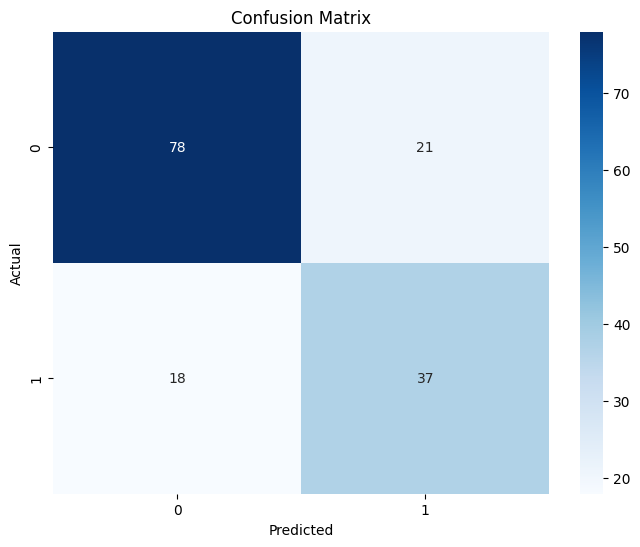

In [ ]:
#Q11 Write a Python Program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

binary_model = LogisticRegression(max_iter = 1000)
binary_model.fit(X_train,y_train)

y_pred_binary = binary_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_binary)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Q12 Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F-1 Score.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test , y_pred, average ='macro')
recall = recall_score(y_test,y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.73
Recall: 0.73
F1-Score: 0.73


In [ ]:
#Q13 Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes = np.unique(y_train),y = y_train)
weight_dict = {i: class_weights[i]for i in range(len(class_weights))}

model_weighted = LogisticRegression(class_weight = weight_dict, max_iter = 5000)
model_weighted.fit(X_train,y_train)

y_pred_weighted = model_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Model Accuracy : {accuracy_weighted:.2f}")



Weighted Model Accuracy : 0.69


In [ ]:
#Q14 Write a Python program to train Logistic Regression on the titanic dataset, handle missing values, and evaluate performance.
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('Titanic.csv')
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.median(),inplace = True)
df[numeric_df.columns] = numeric_df
df = pd.get_dummies(df,drop_first = True)
X = df.drop('Survived',axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

model_titanic= LogisticRegression(max_iter=5000)
model_titanic.fit(X_train,y_train)

accuracy_titanic = model_titanic.score(X_test,y_test)
print(f"Titanic Model Accuracy: {accuracy_titanic:.2f}")

Titanic Model Accuracy: 0.82


In [ ]:
#Q15 Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_titanic_scaled = LogisticRegression()
model_titanic_scaled.fit(X_train_scaled,y_train)

accuracy_titanic_scaled = model_titanic_scaled.score(X_test_scaled, y_test)
print(f"Scaled Data Model Accuracy : {accuracy_titanic_scaled:2f}")

Scaled Data Model Accuracy : 0.743017


In [ ]:
#Q16 Write a Python program to train Logistic Regression and evaluate its performance using ROC - AUC score.
from sklearn.metrics import roc_auc_score

y_prob = model_titanic.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test,y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.89


In [ ]:
#Q17 Write a Python program to train Logistic Regression using a custom learning rate (c=0.5) and evaluate accuracy.
model_custom = LogisticRegression(C=0.5, max_iter = 5000)
model_custom.fit(X_train,y_train)

y_pred_custom = model_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test,y_pred_custom)
print(f"Model Accuracy with C=0.5: {accuracy_custom:.2f}")

Model Accuracy with C=0.5: 0.81


In [ ]:
#Q18 Write a Python program to train Logistic Regression and identify important features based on model coefficients.
feature_importance = pd.Series(model_titanic.coef_[0], index = X_train.columns)
print("Feature Importance:\n", feature_importance.sort_values(ascending = False))

Feature Importance:
 Ticket_1601          1.506605
Ticket_C.A. 37671    1.105927
Ticket_367226        0.907258
Ticket_347742        0.888092
Ticket_347077        0.881728
                       ...   
Ticket_2665         -0.804196
Ticket_349909       -0.889138
Ticket_347082       -0.932119
Pclass              -0.954093
Sex_male            -2.761166
Length: 1725, dtype: float64


In [ ]:
#Q19 Write a python program to train Logistic Regression and evaluate its performance using Cohen's kappa score.
from sklearn.metrics import cohen_kappa_score
y_pred = model_titanic.predict(X_test)

kappa_score = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's kappa Score: {kappa_score:.2f}")

Cohen's kappa Score: 0.62


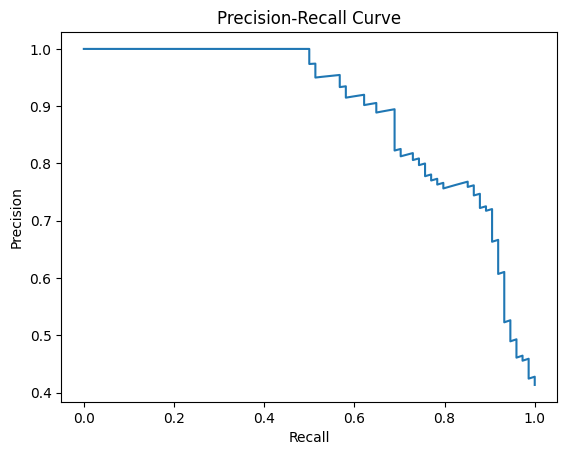

In [ ]:
#Q20 Write a Python program to train Logistic Regression and visualize the Precision- Recall Curve for binary classification.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_prob = model_titanic.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test,y_prob)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#Q21 Write a Python program to train Logistic Regression with different solvers (liblinear,saga,ibfgs) and compare their accuracy.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('diabetes.csv')
X = df.drop('Age', axis = 1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
solvers = ['liblinear','saga','lbfgs']
for solver in solvers:
  model_solver = LogisticRegression(max_iter = 5000,solver = 'saga')
  model_solver.fit(X_train,y_train)

  accuracy_solver = model_solver = model_solver.score(X_test,y_test)
  print(f"Solver: {solver}, Accuracy: {accuracy_solver:.2f}")

Solver: liblinear, Accuracy: 0.09
Solver: saga, Accuracy: 0.09
Solver: lbfgs, Accuracy: 0.09


In [ ]:
#Q22 Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation  Coefficient(MCC).
from sklearn.metrics import matthews_corrcoef
import pandas as pd
df= pd.read_csv('Titanic.csv')
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.median(),inplace = True)
df[numeric_df.columns] = numeric_df
df = pd.get_dummies(df,drop_first = True)
X = df.drop('Survived', axis =1 )
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
model_titanic = LogisticRegression(max_iter=5000)
model_titanic.fit(X_train,y_train)
y_pred  = model_titanic.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

Matthews Correlation Coefficient: 0.62


In [ ]:
#Q23 Write a Python program to train Logistic Regression on both raw and standarized data. Compare their accuracy to see the impact of feature scaling.
from sklearn.preprocessing import StandardScaler
accuracy_raw = model_titanic.score(X_test,y_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = LogisticRegression(max_iter = 5000)
model_scaled.fit(X_train_scaled,y_train)
accuracy_scaled = model_scaled.score(X_test_scaled,y_test)
print(f"Raw Data Model Accuracy: {accuracy_raw:.2f}")
print(f"Standardized Data MOdel Accuracy: {accuracy_scaled:.2f}")

Raw Data Model Accuracy: 0.82
Standardized Data MOdel Accuracy: 0.74


In [ ]:
#Q24 Write a Python program to train Logistic Regression and find the optimal c (reglarixation strength) using cross-validation.
from sklearn.model_selection import cross_val_score
import numpy as np
C_values = [0.01,0.1,1,10,100]
best_C = max(C_values,key = lambda c : np.mean(cross_val_score(LogisticRegression(max_iter = 5000,C=c),X_train,y_train,cv=5)))
print(f"Best C Value: {best_C}")

Best C Value: 100


In [48]:
#Q25 Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter =5000)
model.fit(X_train,y_train)
joblib.dump(model,'logistic_regression.pkl')
loaded_model= joblib.load('logistic_regression.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(y_test,y_pred_loaded):.2f}")

Loaded Model Accuracy: 0.82
